## Introduction:

The purpose of this notebook is to explore and visualise some data about ants movements around an enclosure.

The data has been organised into a dataframe where each row corresponds to a segment of a route. The original routes have been split into segments according to a grid that has been overlaid on the surface.

## Start:

First we import the required modules and set matplotlib to display images in-line throughout the document.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
from scipy import stats

%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 12]

We import the data from the CSV file and display basic information about it; number of rows, columns and their title and data format etc.

In [2]:
Path = 'Ants-103_DF'
df = pd.read_csv(Path+'.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3765 entries, 0 to 3764
Data columns (total 14 columns):
Block                 3765 non-null object
Points                3765 non-null object
Generation            3765 non-null int64
Block Column          3765 non-null int64
Block Row             3765 non-null int64
Start Point           3765 non-null object
End Point             3765 non-null object
Time Spent            3765 non-null float64
Vector Distance       3765 non-null float64
Distance Travelled    3765 non-null float64
Speed                 3765 non-null float64
Efficiency            3728 non-null float64
Vector Angle          3765 non-null float64
General Direction     3765 non-null float64
dtypes: float64(7), int64(3), object(4)
memory usage: 411.9+ KB
None


We can also look at a random sample of the data frame to see what info for each column looks like.

In [3]:
df.sample(5)

,Block,Points,Generation,Block Column,Block Row,Start Point,End Point,Time Spent,Vector Distance,Distance Travelled,Speed,Efficiency,Vector Angle,General Direction
1608,"[14, 6]","[[14.143588367392216, 6.530790959921417], [14....",5,14,6,"[14.143588367392216, 6.530790959921417]","[14.01378011296072, 6.008070442256151]",1.733333,0.538597,0.668351,0.022278,1.240911,256.053737,247.5
1275,"[22, 7]","[[22.00552164252946, 7.348280240182259], [22.0...",4,22,7,"[22.00552164252946, 7.348280240182259]","[22.451546678115765, 7.788923499659109]",13.766667,0.626981,1.863934,0.062131,2.972873,44.652238,22.5
2014,"[27, 9]","[[27.007364640368177, 9.063037043436777], [27....",7,27,9,"[27.007364640368177, 9.063037043436777]","[27.017634237700562, 9.424196700405124]",1.533333,0.361306,0.587414,0.019580,1.625809,88.371230,67.5
1614,"[19, 6]","[[19.663813529998738, 6.293844460951601], [19....",5,19,6,"[19.663813529998738, 6.293844460951601]","[19.988195036778357, 6.399535783174846]",0.900000,0.341166,0.369518,0.012317,1.083105,18.046859,0.0
2777,"[28, 4]","[[28.530287552290496, 4.995544593739259], [28....",10,28,4,"[28.530287552290496, 4.995544593739259]","[28.014908106973923, 4.606550826495176]",1.433333,0.645703,0.688102,0.022937,1.065663,217.044468,202.5


Pandas has some good out of the box commands to start to break down these thosands of entries and to get a feel for how the characteristics relate to each other. <br>
Using scatter matrix we'll plot some of the key ones on x and y and see what the correlations are.

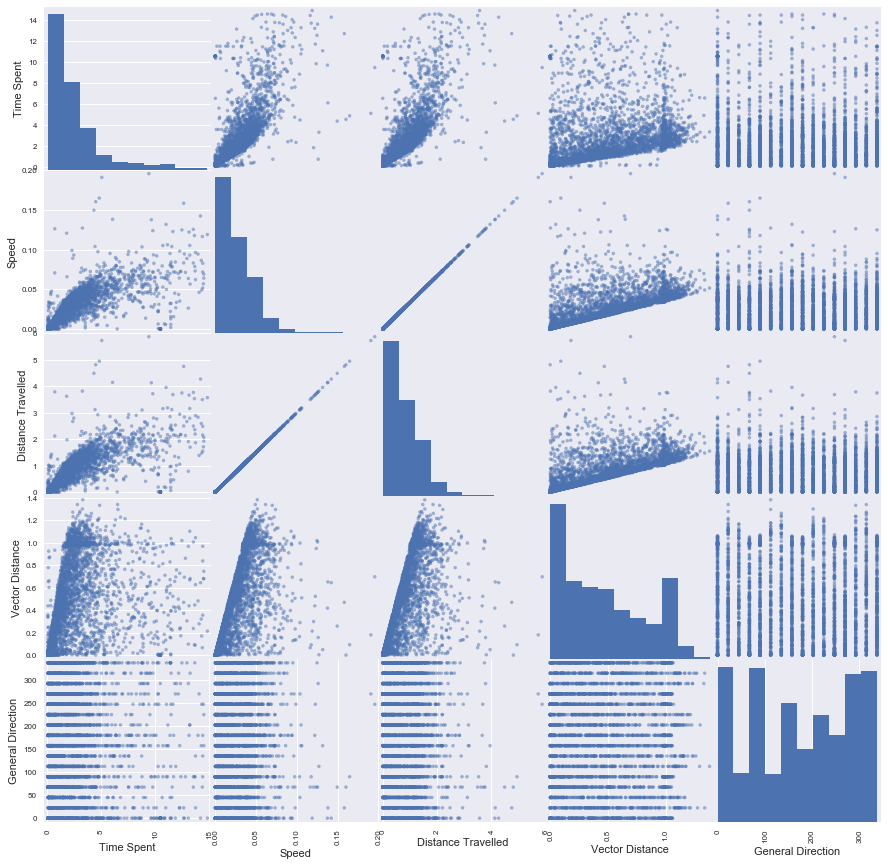

In [4]:
from pandas.plotting import scatter_matrix
attributes = ['Time Spent', 'Speed' , 'Distance Travelled', 'Vector Distance', 'General Direction']
scatter_matrix(df[attributes], figsize=(15, 15))
plt.show()

We can also isolate one particular characteristic and see how the data is distributed by plotting a histogram.<br>
This is easy to do using the pandas plotting function with the kind set to 'hist'. 

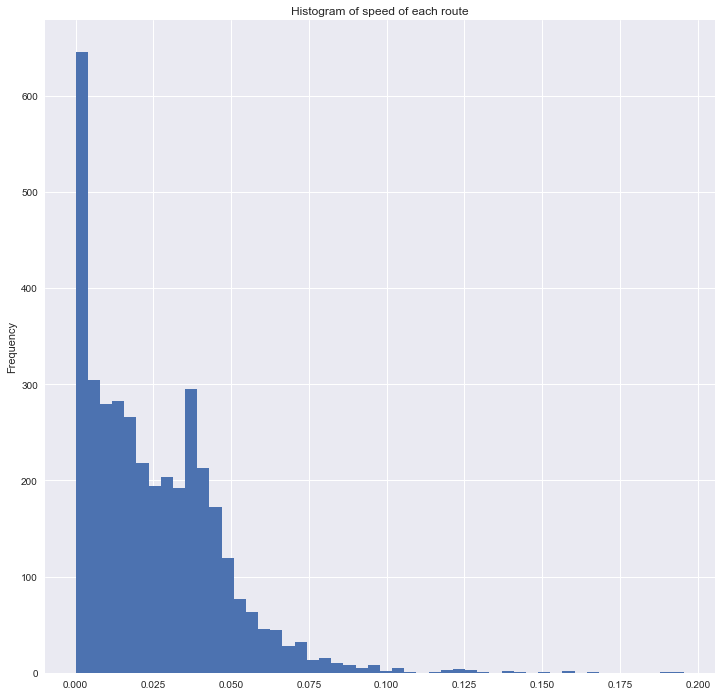

In [5]:
#df = df.loc[df['Efficiency'] > 25.0]

df['Speed'].plot(kind='hist', bins=50)
plt.title('Histogram of speed of each route')
plt.show()

One of our characteristics of behaviour is the direction of travel. If we plot this as a hist we can see clear peaks for the cardinal directions of N, S, E, and W.

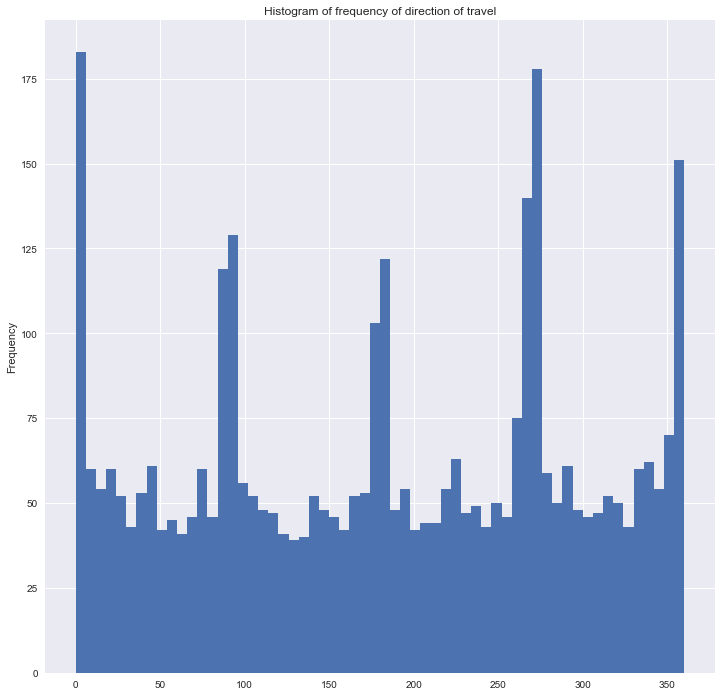

In [6]:
df['Vector Angle'].plot(kind='hist', bins=60)
plt.title('Histogram of frequency of direction of travel')
plt.show()

This is not a very clear way of visualising this kind of data so we can reformatt it as a windrose.

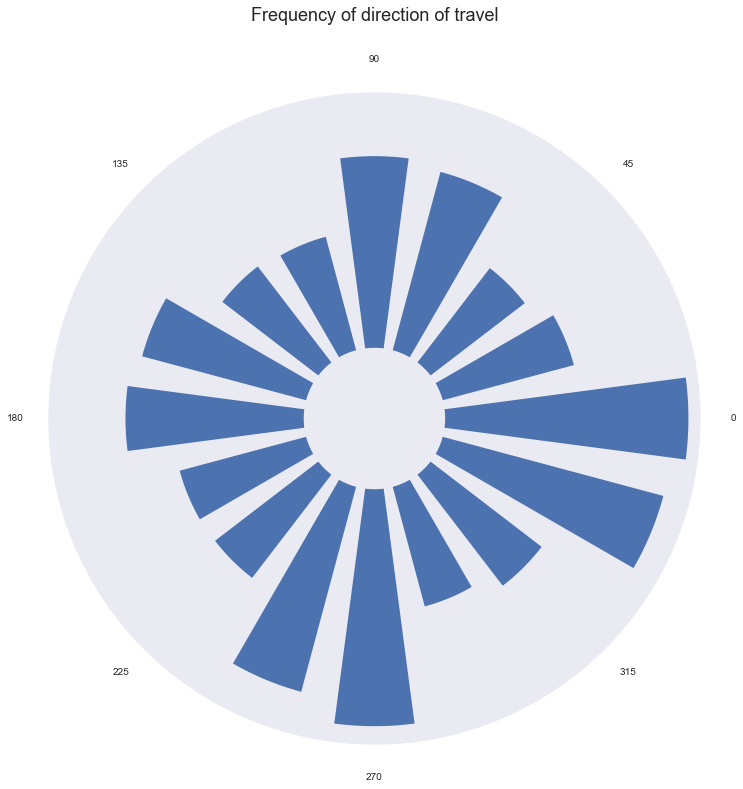

In [7]:
windrose = df.groupby(['General Direction']).count()['Block']

N = len(windrose)
theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
radii = windrose.values
width = (2*np.pi) / N

fig = plt.figure()
ax1 = fig.add_subplot(111, polar=True)
bars = ax1.bar(theta, radii, width=width / 1.5, bottom=100)

# Set the circumference labels
ax1.set_xticks(np.linspace(0, 2 * np.pi, 8, endpoint=False))
ax1.set_xticklabels(range(0, 360, 45))
ax1.set_thetagrids(np.arange(0, 360, 45), frac=1.1)

ax1.set_title('Frequency of direction of travel', fontsize=18, y=1.1)
ax1.set_yticklabels([])
ax1.grid()

plt.show()

The visualisations we've been looking at so far are for all the routes spread out across the board. The next level we can look at is taking sample of the activity on a block by block level.

This data can be extracted as the mean, mode, median, sum etc of the activity that has occurred on each block.

In [8]:
meangrouped = df.groupby(['Block']).mean()
meangrouped.head()

,Generation,Block Column,Block Row,Time Spent,Vector Distance,Distance Travelled,Speed,Efficiency,Vector Angle,General Direction
Block,,,,,,,,,,
"[0, 0]",5.833333,0.0,0.0,3.916667,0.284190,0.733346,0.024445,85.019965,150.290600,138.750000
"[0, 1]",3.208333,0.0,1.0,2.270833,0.195998,1.223320,0.040777,13.426214,151.485509,142.500000
"[0, 2]",2.550000,0.0,2.0,1.111667,0.110441,0.458602,0.015287,41.030939,188.922397,180.000000
"[0, 3]",2.600000,0.0,3.0,1.900000,0.009793,0.073131,0.002438,18.187629,190.479932,180.000000
"[0, 4]",10.549020,0.0,4.0,1.503268,0.060339,0.539510,0.017984,563.359225,159.454184,149.117647


In [9]:
summedgrouped = df.groupby(['Block']).sum()
summedgrouped.head()

,Generation,Block Column,Block Row,Time Spent,Vector Distance,Distance Travelled,Speed,Efficiency,Vector Angle,General Direction
Block,,,,,,,,,,
"[0, 0]",35,0,0,23.500000,1.705140,4.400074,0.146669,510.119789,901.743600,832.5
"[0, 1]",77,0,24,54.500000,4.703948,29.359686,0.978656,322.229125,3635.652205,3420.0
"[0, 2]",51,0,40,22.233333,2.208814,9.172033,0.305734,820.618777,3778.447945,3600.0
"[0, 3]",13,0,15,9.500000,0.048966,0.365655,0.012188,90.938144,952.399659,900.0
"[0, 4]",538,0,204,76.666667,3.077299,27.515016,0.917167,27041.242823,8132.163394,7605.0


To calculate the magnitude of a 

In [10]:
vectormag = df.groupby(['Block']).count()['General Direction']
vectormag.head()

Block
[0, 0]     6
[0, 1]    24
[0, 2]    20
[0, 3]     5
[0, 4]    51
Name: General Direction, dtype: int64

In [11]:
vectordir = df.groupby(['Block']).agg(lambda x: stats.mode(x, nan_policy='omit'))['General Direction']
#vectordir = df.groupby(['Block'])['General Direction'].value_counts()
vectordir.head()

C:\Users\Maurice\Anaconda3\lib\site-packages\scipy\stats\stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


Block
[0, 0]     ([90.0], [3])
[0, 1]     ([67.5], [7])
[0, 2]    ([270.0], [7])
[0, 3]     ([67.5], [2])
[0, 4]    ([67.5], [12])
Name: General Direction, dtype: object

In [12]:
dirmagdf = pd.concat((vectordir, vectormag), axis=1)
dirmagdf.columns = ['Popular Angle', 'Angle Count']
dirmagdf['Direction'] = dirmagdf['Popular Angle'].map(lambda x: x[0][0])
dirmagdf['Magnitude'] = dirmagdf['Popular Angle'].map(lambda a: (a[1][0]))/dirmagdf['Angle Count']
dirmagdf.head(10)

,Popular Angle,Angle Count,Direction,Magnitude
Block,,,,
"[0, 0]","([90.0], [3])",6,90.0,0.500000
"[0, 1]","([67.5], [7])",24,67.5,0.291667
"[0, 2]","([270.0], [7])",20,270.0,0.350000
"[0, 3]","([67.5], [2])",5,67.5,0.400000
"[0, 4]","([67.5], [12])",51,67.5,0.235294
"[0, 5]","([270.0], [12])",44,270.0,0.272727
"[0, 6]","([90.0], [9])",38,90.0,0.236842
"[0, 7]","([90.0], [16])",50,90.0,0.320000
"[0, 8]","([90.0], [6])",16,90.0,0.375000


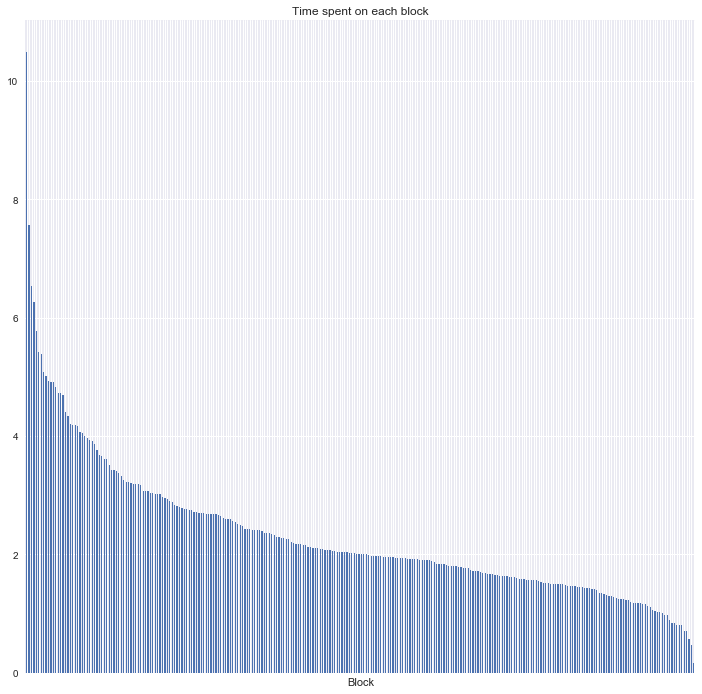

In [13]:
meangrouped.sort_values(by='Time Spent', inplace=True, ascending=False)

meangrouped['Time Spent'].plot(kind='bar')
plt.title('Time spent on each block')
plt.tick_params(axis='x', which='both',
    bottom='off', top='off', labelbottom='off')
plt.show()

In [14]:
heatmap = df.groupby(['Block Row', 'Block Column']).sum()
heatmap.head(10)

Generation  Time Spent  Vector Distance  \
Block Row Block Column                                            
0         0                     35   23.500000         1.705140   
          1                     24   11.900000         2.989174   
          2                     60   16.800000         4.564067   
          3                     58   17.000000         3.847927   
          4                     20    9.500000         1.998047   
          6                     13   10.500000         0.000000   
          11                    38    8.066667         1.474941   
          12                    34   14.200000         4.224613   
          13                    44   25.333333         4.484718   
          14                   105   39.933333         7.857376   

                        Distance Travelled     Speed  Efficiency  \
Block Row Block Column                                             
0         0                       4.400074  0.146669  510.119789   
          1                       4.427624  0.147587    4.445840   
          2                       6.288535  0.209618   10.088040   
          3                       6.077967  0.202599   12.478407   
          4                       3.623643  0.120788    5.743978   
          6                       0.000000  0.000000         NaN   
          11                      2.366232  0.078874   16.444704   
          12                      5.446507  0.181550    7.183551   
          13                      5.895807  0.196527    9.035705   
          14                     13.831459  0.461049   27.896749   

                        Vector Angle  General Direction  
Block Row Block Column                                   
0         0               901.743600              832.5  
          1               570.370614              540.0  
          2              1480.519870             1372.5  
          3              1294.868383             1215.0  
          4               529.596038              517.5  
          6                 0.000000                0.0  
          11             1129.569716             1057.5  
          12             1049.276077              967.5  
          13             1196.167987             1125.0  
          14             2741.494488             2610.0

In [15]:
vectorfield = df.groupby(['Block Row', 'Block Column']).count()['General Direction']
vectorfield.unstack().head()

Block Column,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Block Row,,,,,,,,,,,,,,,,,,,,,
0,6.0,3.0,8.0,7.0,3.0,NaN,1.0,NaN,NaN,NaN,...,37.0,64.0,72.0,44.0,28.0,20.0,14.0,11.0,8.0,6.0
1,24.0,4.0,6.0,3.0,3.0,2.0,NaN,NaN,NaN,NaN,...,25.0,33.0,40.0,37.0,24.0,21.0,9.0,6.0,3.0,3.0
2,20.0,6.0,8.0,5.0,1.0,3.0,2.0,1.0,2.0,7.0,...,20.0,23.0,25.0,29.0,11.0,7.0,6.0,4.0,8.0,7.0
3,5.0,1.0,3.0,3.0,3.0,6.0,5.0,3.0,5.0,7.0,...,26.0,28.0,28.0,34.0,43.0,14.0,12.0,11.0,10.0,9.0
4,51.0,2.0,2.0,2.0,3.0,3.0,2.0,4.0,1.0,1.0,...,28.0,21.0,22.0,20.0,39.0,25.0,14.0,10.0,11.0,14.0


We will now save out a number of these stats for each block as a CSV file.<br>
**This has now been superseeded by the JSON exporter**

In [16]:
timemap = heatmap['Time Spent'].unstack()
timemap.fillna(value=0.01, inplace=True)
outfile1 = Path+"_TimeSpent.csv"
#timemap.to_csv(outfile1)


speedmap = heatmap['Speed'].unstack()
speedmap.fillna(value=0.01, inplace=True)
outfile2 = Path+"_Speed.csv"
#speedmap.to_csv(outfile2)

distancemap = heatmap['Distance Travelled'].unstack()
distancemap.fillna(value=0.01, inplace=True)
outfile3 = Path+"_DistanceTravelled.csv"
#distancemap.to_csv(outfile3)

timemap.head(10)

Block Column,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Block Row,,,,,,,,,,,,,,,,,,,,,
0,23.500000,11.900000,16.800000,17.000000,9.500000,0.010000,10.500000,0.010000,0.010000,0.010000,...,88.533333,241.333333,246.000000,119.900000,61.633333,52.333333,38.666667,44.100000,13.133333,34.633333
1,54.500000,4.066667,7.033333,7.100000,2.533333,1.600000,0.010000,0.010000,0.010000,0.010000,...,56.500000,65.533333,65.333333,75.966667,72.500000,40.733333,17.033333,6.233333,5.400000,10.300000
2,22.233333,8.700000,7.133333,14.700000,3.200000,5.766667,3.433333,1.966667,3.900000,8.233333,...,25.933333,47.100000,35.700000,48.300000,16.033333,16.933333,17.733333,6.033333,11.200000,19.333333
3,9.500000,2.666667,7.033333,4.066667,12.633333,11.733333,16.133333,15.233333,5.166667,8.700000,...,69.766667,51.433333,50.700000,70.766667,92.866667,39.266667,8.400000,13.700000,13.333333,18.133333
4,76.666667,10.766667,3.666667,5.000000,8.100000,3.866667,5.100000,8.100000,1.566667,2.166667,...,46.233333,42.633333,50.066667,57.833333,82.666667,36.633333,39.033333,15.000000,15.800000,42.533333
5,45.533333,3.000000,5.066667,7.066667,13.066667,14.066667,1.966667,6.266667,0.010000,0.800000,...,61.333333,57.333333,47.833333,18.333333,16.300000,10.200000,13.400000,13.533333,11.500000,39.600000
6,17.866667,5.366667,0.700000,0.010000,0.010000,0.010000,1.133333,4.733333,0.010000,15.133333,...,66.166667,55.400000,54.600000,19.666667,12.700000,14.800000,8.900000,6.066667,18.900000,41.500000
7,58.266667,0.010000,2.033333,0.010000,0.010000,0.010000,0.010000,4.066667,8.833333,8.700000,...,36.300000,48.300000,96.833333,48.033333,40.200000,11.333333,5.366667,14.433333,17.266667,46.900000
8,52.200000,5.166667,13.233333,1.733333,2.400000,0.010000,0.800000,21.166667,13.600000,9.833333,...,50.966667,57.000000,183.333333,62.700000,34.500000,27.033333,6.233333,6.066667,12.066667,45.666667


Seaborn allows us to print ths type of matrix as a heatmap. We can 

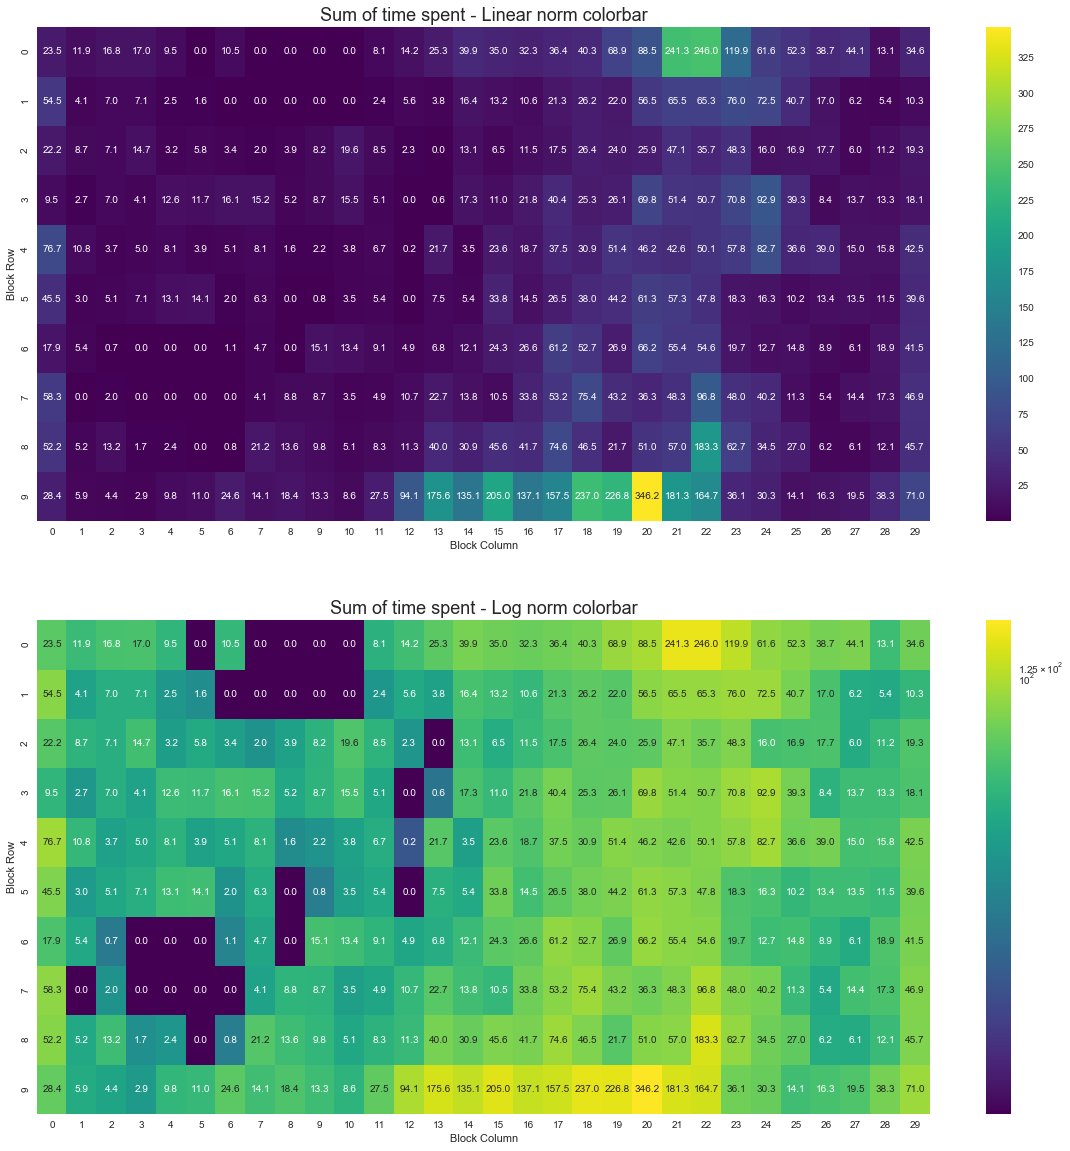

In [19]:
import copy
import matplotlib
fig, axs = plt.subplots(nrows=2, figsize=(20,20))

sns.heatmap(timemap, annot=True, fmt='.1f', cmap='viridis', 
                 cbar_kws={"ticks": [np.arange(0, max(timemap.max()), 25)]}, 
                 ax=axs[0])
#axs[0].invert_yaxis()
axs[0].set_title('Sum of time spent - Linear norm colorbar', fontsize=18)

sns.heatmap(timemap, annot=True, fmt='.1f', cmap='viridis', 
                 cbar_kws={"ticks": [np.arange(0, max(timemap.max()), 25)]}, 
                 norm=LogNorm(), ax=axs[1])
#axs[1].invert_yaxis()
axs[1].set_title('Sum of time spent - Log norm colorbar', fontsize=18)

plt.show()